Date: **10.11.2021**

Roll No. and Name: **19BCE245 Aayush Shah**

Course Code and Name: **2CS501 Machine Learning**

Practical: **9**

Definition:  **Ex-OR Gate/any other problem using Backpropagation Neural Networks (self-implementation) (4 Hrs)**


# Forward Propagation

In [ ]:
def forward_propagation(x,y,parameters):
    m=x.shape[1]
    w1=parameters["W1"]
    w2=parameters["W2"]
    b1=parameters["b1"]
    b2=parameters["b2"]
    
    net1=np.dot(w1,x)+b1
    A1 = 1/(1+np.exp(-net1))  #sigmoid
    net2=np.dot(w2,A1)+b2 # layer2
    A2 = 1/(1+np.exp(-net2))
    
    cache=(net1,A1,w1,b1,net2,A2,w2,b2)
    logprobe=np.multiply(np.log(A2),y)+np.multiply(np.log(1-A2),(1-y))   #cross  entropy
    cost= -np.sum(logprobe)/m
    return cost,cache,A2

# Backward Propagation

In [ ]:
def backward_propagation(x,y,cache):
    m=x.shape[1]
    (net1,A1,w1,b1,net2,A2,w2,b2)=cache
    
    dnet2=A2-y
    
    # gradients of all the parameters which are to be updated
    dw2=np.dot(dnet2,A1.T)/m
    db2=np.sum(dnet2,axis=1,keepdims=True)/m
    
    dA1=np.dot(w2.T,dnet2)
    dnet1=np.multiply(dA1,A1*(1-A1))
    dw1=np.dot(dnet1,x.T)/m
    db1=np.sum(dnet1,axis=1,keepdims=True)/m
    
    gradients={'dz2':dnet2,'dw2':dw2,'db2':db2,'dz1':dnet1,'dw1':dw1,'db1':db1}
    return gradients

# Updating parameters

In [ ]:
def update_parameters(parameters,gradients,lr):
  # updated here by making use of gradient descent algorithm
    parameters['W1']=parameters['W1']- lr * gradients['dw1']
    parameters['W2']=parameters['W2']- lr * gradients['dw2']
    parameters['b1']=parameters['b1']- lr * gradients['db1']
    parameters['b2']=parameters['b2']- lr * gradients['db2']
    
    return parameters

# Main


XOR Gate
Final parameters: 
 W = (array([[ 0.53475057,  0.42025292],
       [-0.12012437, -1.65813182]]), array([[-0.1875757 ,  1.70313969]])) 
 b = (array([[0.],
       [0.]]), array([[0.]]))

Predictions :
Input  Expected Output  Predicted output
[0 0]          [0]             [0.]
[0 1]          [1]             [1.]
[1 0]          [1]             [1.]
[1 1]          [0]             [0.]


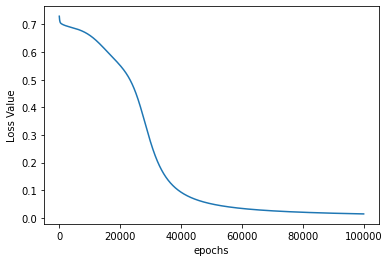

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([[0,0,1,1],[0,1,0,1]])
y=np.array([[0,1,1,0]])

hiddenlayer=2   # Number of nearons in hidden layer

inputfeatures=x.shape[0]    
outputfeatures=y.shape[0]

W1=np.random.randn(hiddenlayer,inputfeatures)   #2x2
W2=np.random.randn(outputfeatures,hiddenlayer)  #1x2

b1=np.zeros((hiddenlayer,1)) #bias
b2=np.zeros((outputfeatures,1))
parameters={"W1":W1,"W2":W2,"b1":b1,"b2":b2}
epoch=100000
lr=0.01
losses = np.zeros((epoch,1))
for i in range(epoch):
    losses[i,0],cache,A2=forward_propagation(x,y,parameters)  #cost=losses
    gradients= backward_propagation(x,y,cache)
    parameters=update_parameters(parameters,gradients,lr)
    

x=np.array([[0,0,1,1],[0,1,0,1]])
cost,c,A2= forward_propagation(x,y,parameters)
predict=(A2>0.5)*1.0
print(f'\nXOR Gate')
print(f'Final parameters: \n W = {W1,W2} \n b = {b1,b2}')

print('\nPredictions :')
print('Input  Expected Output  Predicted output')
for i in range(x.shape[1]):
      print(x.T[i],'        ',y.T[i],'           ',predict.T[i])
plt.figure()
plt.plot(losses)
plt.xlabel('epochs')
plt.ylabel('Loss Value')

plt.show()

# Conclusion :

I had to build a two-layered artificial neural network from the ground up. This clarified my understanding of how to implement a multi-layered ANN. I created six functions to achieve the following tasks:
1. Computing cost
2. Sigmoid function
3. Forward propagation
4. Backward propagation
5. Updating Parameters
6. Plotting loss VS epochs graph

- What I learned in class theoretically, I put into practise here. I used inputs from the previous layer's outputs to conduct forward propagation. Then I calculated the gradients of parameters to do backward propagation. Then, in each epoch, I adjusted those parameters. I kept track of the loss for each epoch and made a graph of Loss vs. Epoch.
- Finally I calculated the time taken for executing the manual implementation and inbuilt library function. I was surprised to see atleast 10 times difference between both.
- This practical helped me to clear my understandings and implementation of ANN by coding it manually from scratch as well as using MLPClassifier from sklearn package.